In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv("order_delay_cleaned.csv")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,is_late,delivery_time_days,shipping_time_days,purchase_month,purchase_dayofweek
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,0,8,2.0,10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,0,13,0.0,7,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,0,9,0.0,8,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,0,13,3.0,11,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,0,2,0.0,2,1


# EDA 

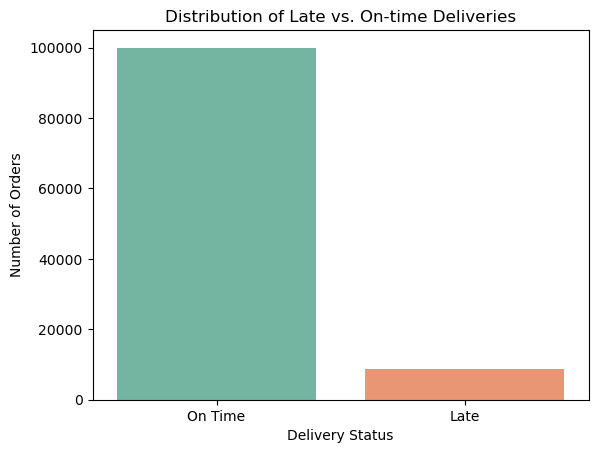

In [26]:
### How balance is target variable

sns.countplot(data=df, x='is_late', palette='Set2')
plt.title("Distribution of Late vs. On-time Deliveries")
plt.xticks([0, 1], ['On Time', 'Late'])
plt.ylabel("Number of Orders")
plt.xlabel("Delivery Status")
plt.show()

In [27]:
df["is_late"].value_counts()

0    99953
1     8678
Name: is_late, dtype: int64

In [28]:
df['shipping_time_days'].describe()



count    108631.000000
mean          2.400226
std           3.540856
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         125.000000
Name: shipping_time_days, dtype: float64

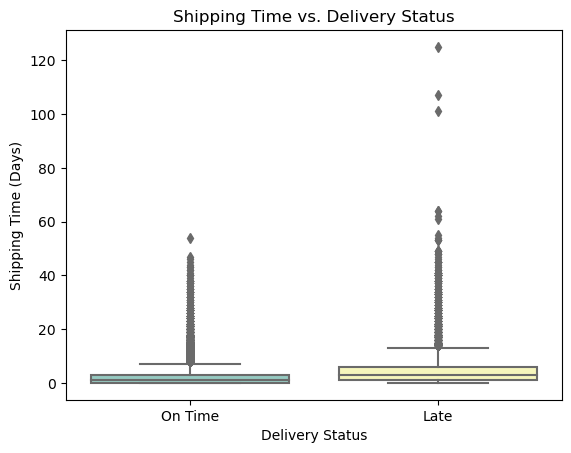

In [29]:
### How does shipping time relate to late delivery?

sns.boxplot(x='is_late', y='shipping_time_days', data=df, palette='Set3')
plt.title("Shipping Time vs. Delivery Status")
plt.xticks([0, 1], ['On Time', 'Late'])
plt.xlabel("Delivery Status")
plt.ylabel("Shipping Time (Days)")
plt.show()

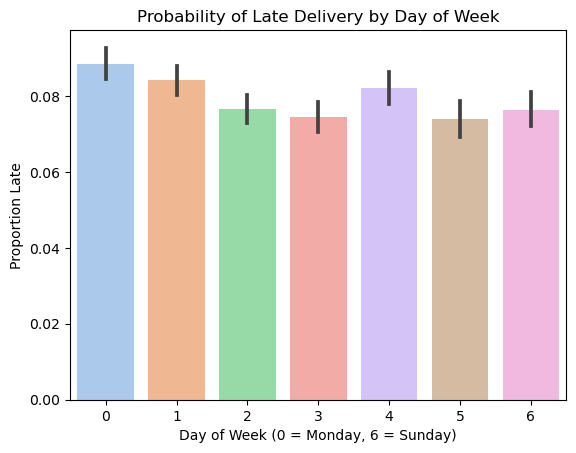

In [32]:
### Are certain weekdays riskier for delays?

sns.barplot(
    x='purchase_dayofweek', 
    y='is_late', 
    data=df,
    estimator=np.mean,
    palette='pastel'
)
plt.title("Probability of Late Delivery by Day of Week")
plt.xlabel("Day of Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Proportion Late")
plt.show()

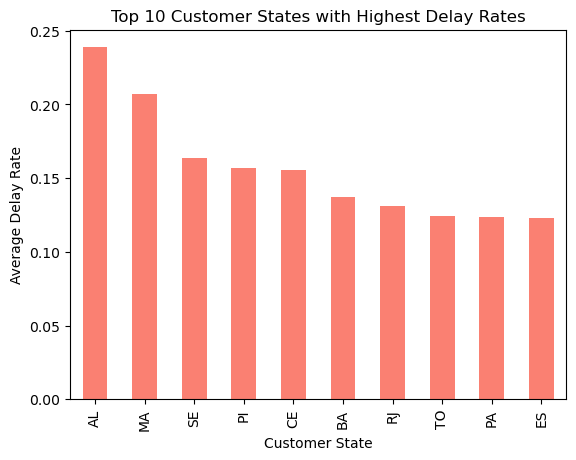

In [33]:
### Which customer states have higher delay rates?

state_delay = df.groupby('customer_state')['is_late'].mean().sort_values(ascending=False).head(10)

state_delay.plot(kind='bar', color='salmon')
plt.title("Top 10 Customer States with Highest Delay Rates")
plt.ylabel("Average Delay Rate")
plt.xlabel("Customer State")
plt.show()

### Findins so far

1. Distribution of Late vs. On-Time Deliveries

    The majority of orders are on time.

    Only a small portion are delivered late.

    This indicates a class imbalance in your dataset (important to handle during model training — like using class_weight='balanced' or oversampling later).


2. Shipping Time vs. Delivery Status

    Late deliveries tend to have slightly higher shipping times.

    There's more spread and outliers in shipping time for late deliveries (some go over 100 days!)

    Shipping time is a useful feature in predicting delays.



3. Probability of Late Delivery by Day of Week

    Orders placed on Monday and Tuesday have a slightly higher chance of being delayed.

    Weekends (especially Saturday) have slightly lower delay probabilities.

    Could reflect warehouse and courier behavior or order batching cycles.
    


4. Top 10 Customer States with Highest Delay Rates

    States like AL (Alagoas) and MA (Maranhão) have much higher delay rates than others.

    These regions might be logistically harder to reach, indicating regional performance disparities.

#### Summary of EDA Learnings:
Area	Key Learning
* Target Distribution	Highly imbalanced – most deliveries are on time
* Shipping Time	Correlated with delay — longer shipping = more delay
* Purchase Day	Monday-Tuesday orders more likely to be delayed
* Customer Region	Some states consistently face more delays

In [34]:
# Filter numeric features
numeric_cols = df.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.drop(columns=['order_item_id'])  # Not useful for prediction

# Compute correlation with target
corr_matrix = numeric_cols.corr()

# Display correlation with 'is_late' only
corr_with_target = corr_matrix['is_late'].sort_values(ascending=False)
print(corr_with_target)

is_late                     1.000000
delivery_time_days          0.585668
shipping_time_days          0.217291
freight_value               0.040432
customer_zip_code_prefix    0.024619
price                       0.020871
purchase_dayofweek         -0.013802
purchase_month             -0.025448
Name: is_late, dtype: float64


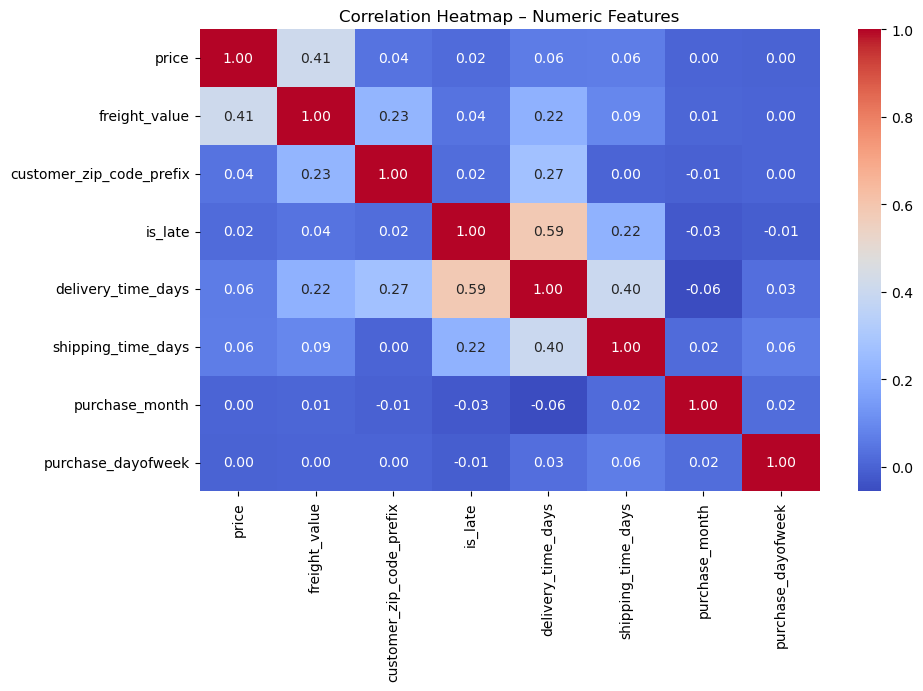

In [36]:
# Full heatmap of numeric features


plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap – Numeric Features")
plt.show()